<a href="https://colab.research.google.com/github/mharrisonbaker/DATA620/blob/main/citations_work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Import

In [2]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd


In [4]:
df1 = pd.read_json('/content/drive/MyDrive/academic_citation_v10/dblp-ref-2.json', lines=True, dtype=False)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   abstract    827533 non-null   object
 1   authors     999998 non-null   object
 2   n_citation  1000000 non-null  int64 
 3   references  875583 non-null   object
 4   title       1000000 non-null  object
 5   venue       1000000 non-null  object
 6   year        1000000 non-null  int64 
 7   id          1000000 non-null  object
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [6]:
df2 = pd.read_json('/content/drive/MyDrive/academic_citation_v10/dblp-ref-1.json', lines=True, dtype=False)

In [7]:
df3 = pd.read_json('/content/drive/MyDrive/academic_citation_v10/dblp-ref-0.json', lines=True, dtype=False)

In [8]:
df4 = pd.read_json('/content/drive/MyDrive/academic_citation_v10/dblp-ref-3.json', lines=True, dtype=False)

##Data exploration

In [9]:
#combine the df
df = pd.concat([df1, df2, df3, df4])

pd.DataFrame.to_csv(df, 'all_cites.txt', sep=',', na_rep='', index=False)

In [10]:
df.head(5)

,abstract,authors,n_citation,references,title,venue,year,id
0,"In this paper, a robust 3D triangular mesh wat...","[S. Ben Jabra, Ezzeddine Zagrouba]",50,"[09cb2d7d-47d1-4a85-bfe5-faa8221e644b, 10aa16d...",A new approach of 3D watermarking based on ima...,international symposium on computers and commu...,2008,4ab3735c-80f1-472d-b953-fa0557fed28b
1,We studied an autoassociative neural network w...,"[Joaquín J. Torres, Jesús M. Cortés, Joaquín M...",50,"[4017c9d2-9845-4ad2-ad5b-ba65523727c5, b118738...",Attractor neural networks with activity-depend...,Neurocomputing,2007,4ab39729-af77-46f7-a662-16984fb9c1db
2,It is well-known that Sturmian sequences are t...,"[Genevi eve Paquin, Laurent Vuillon]",50,"[1c655ee2-067d-4bc4-b8cc-bc779e9a7f10, 2e4e57c...",A characterization of balanced episturmian seq...,Electronic Journal of Combinatorics,2007,4ab3a4cf-1d96-4ce5-ab6f-b3e19fc260de
3,One of the fundamental challenges of recognizi...,"[Yaser Sheikh, Mumtaz Sheikh, Mubarak Shah]",221,"[056116c1-9e7a-4f9b-a918-44eb199e67d6, 05ac52a...",Exploring the space of a human action,international conference on computer vision,2005,4ab3a98c-3620-47ec-b578-884ecf4a6206
4,This paper generalizes previous optimal upper ...,"[Efraim Laksman, Håkan Lennerstad, Magnus Nils...",0,"[01a765b8-0cb3-495c-996f-29c36756b435, 5dbc8cc...",Generalized upper bounds on the minimum distan...,Ima Journal of Mathematical Control and Inform...,2015,4ab3b585-82b4-4207-91dd-b6bce7e27c4e


In [11]:
#Check for NaN values
df.isna().sum().sum()

893344

In [12]:
#id will be the key value so it's good that nothing here is missing
df['id'].isna().sum()

0

In [13]:
#even though there are NaN values in the references column these rows will remain because of the other info in the row
df['references'].isna().sum()

362865

In [18]:
#find top 10 venues
df['venue'].value_counts()[:10].index.tolist()

['',
 'Lecture Notes in Computer Science',
 'international conference on acoustics, speech, and signal processing',
 'international conference on robotics and automation',
 'international conference on image processing',
 'international conference on communications',
 'international symposium on circuits and systems',
 'global communications conference',
 'international geoscience and remote sensing symposium',
 'intelligent robots and systems']

[2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007]

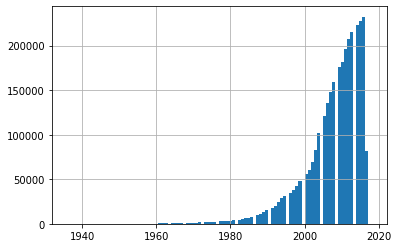

In [27]:
#check out the year distribution
import matplotlib.pyplot as plt
hist = df['year'].hist(bins=100)
plt.savefig("year_hist.png", bbox_inches='tight', dpi=100)

#find top 10 venues
df['year'].value_counts()[:10].index.tolist()

##Network Graph Representation

In [28]:
#explode the references column to create an edge list
dfG=df[['id', 'references']].copy()
dfG.set_index(['id'])
dfG['references'].tolist()
dfG=dfG.explode('references')
dfG.head()

,id,references
0,4ab3735c-80f1-472d-b953-fa0557fed28b,09cb2d7d-47d1-4a85-bfe5-faa8221e644b
0,4ab3735c-80f1-472d-b953-fa0557fed28b,10aa16da-3cc8-4af6-9d66-48037e915d76
0,4ab3735c-80f1-472d-b953-fa0557fed28b,35cb45c3-9408-4096-ab30-bc2e4de3fb5d
0,4ab3735c-80f1-472d-b953-fa0557fed28b,661a342e-a911-4420-b67d-51c75d3b14e9
0,4ab3735c-80f1-472d-b953-fa0557fed28b,779553f3-e4c1-456e-bc01-5eb9d9567541


In [29]:
import networkx as nx

In [30]:
#create total graph from the df
G = nx.from_pandas_edgelist(dfG, source='id', target='references', create_using=nx.Graph)

In [ ]:
#the graph is really big in RAM
nx.info(G)

In [ ]:
#find the biggest subgraph
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
nx.info(G0)

In [31]:
import numpy as np

##Analyze a random Sub-graph in the network

In [143]:
#generate random number (you can re-run this cell and the ones below to generate a new graph)
random_id = np.random.choice(5000,size = 1)

#pick random row of df
dfR = df.iloc[random_id]

#grab the ID of the row (a random id)
rID=dfR['id'].item()
rID

#list the nodes connected to the random node
Nlist=list(nx.all_neighbors(G,rID))
Nlist.append(rID)

#make a small dataframe from the neighbors
df_rand=df[df['id'].isin(Nlist)]
df_rand

,abstract,authors,n_citation,references,title,venue,year,id
4765,A novel signal conditioning system for linear ...,"[Ralph M. Ford, Robert Weissbach, David R. Loker]",50,[2437fba4-c43f-475b-8c18-0932d20142fb],A novel DSP-based LVDT signal conditioner,IEEE Transactions on Instrumentation and Measu...,2001,4c491481-2b15-4f6e-afdf-906533903f8d
389626,This paper proposes a simple and novel method ...,"[Saroj Kumar Mishra, Ganapati Panda, Debi Pras...",27,"[2437fba4-c43f-475b-8c18-0932d20142fb, 4c49148...",A Novel Method of Extending the Linearity Rang...,IEEE Transactions on Instrumentation and Measu...,2010,cc0cfbaa-1bc5-4f51-9a51-04f399f65131
790764,Linear variable differential transformer (LVDT...,"[Prasant Misra, Santoshini Kumari Mohini, Saro...",1,"[2437fba4-c43f-475b-8c18-0932d20142fb, 4c49148...",The Design and Implementation of an ANN-based ...,arXiv: Systems and Control,2014,c398a3cc-c34f-4332-aa02-f9df9a267330
967476,The paper presents the design and validation o...,"[K. V. Santhosh, B. K. Roy]",0,"[0a32d7a3-23c1-4a7b-b62b-f5c85338e01d, 2437fba...",Online implementation of an adaptive calibrati...,Applied Soft Computing,2017,7b0c0955-5f94-4c3e-aa7b-13f88db314a0
817096,This paper deals with a displacement sensor ne...,"[Paolo Ferrari, Alessandra Flammini, D. Mariol...",85,"[251f92aa-8d5d-42cd-a5df-f96e9c343ca5, 3e32514...",IEEE 1588-based Synchronization System for a D...,IEEE Transactions on Instrumentation and Measu...,2006,0e4c2b0f-d620-450d-b7cb-38add0f8213d
883395,This paper presents a new method for signal pr...,"[D. Crescini, Allessandra Flammini, D. Marioli...",48,[],Application of an FFT-based algorithm to signa...,IEEE Transactions on Instrumentation and Measu...,1998,2437fba4-c43f-475b-8c18-0932d20142fb
886092,This paper presents a novel instrument for the...,"[Alessandra Flammini, D. Marioli, E. Sisinni, ...",50,"[2437fba4-c43f-475b-8c18-0932d20142fb, 4c49148...",A multichannel DSP-based instrument for displa...,IEEE Transactions on Instrumentation and Measu...,2005,251f92aa-8d5d-42cd-a5df-f96e9c343ca5
932883,A simple algorithm for the amplitude estimatio...,"[Shang-Teh Wu, Jyun-Lang Hong]",50,"[2437fba4-c43f-475b-8c18-0932d20142fb, 251f92a...",Five-Point Amplitude Estimation of Sinusoidal ...,IEEE Transactions on Instrumentation and Measu...,2010,349b40fd-5222-427e-873f-21f3bbccad6c


In [144]:
#preserve the ids, refs, and titles
dfG_rand=df_rand[['id', 'references','title']].copy()
dfG_rand.set_index(['id'])
dfG_rand['references'].tolist()

#cause the refs column is stored as a list the individual refs must be 'exploded'
dfG_rand=dfG_rand.explode('references')
dfG_rand.reset_index(drop=True, inplace=True)

#now the multiple refs can be tied to single id, this can be our edgelist
dfG_rand.head(10)

,id,references,title
0,4c491481-2b15-4f6e-afdf-906533903f8d,2437fba4-c43f-475b-8c18-0932d20142fb,A novel DSP-based LVDT signal conditioner
1,cc0cfbaa-1bc5-4f51-9a51-04f399f65131,2437fba4-c43f-475b-8c18-0932d20142fb,A Novel Method of Extending the Linearity Rang...
2,cc0cfbaa-1bc5-4f51-9a51-04f399f65131,4c491481-2b15-4f6e-afdf-906533903f8d,A Novel Method of Extending the Linearity Rang...
3,cc0cfbaa-1bc5-4f51-9a51-04f399f65131,6edd2d45-18d5-4569-a234-8cb99df1666f,A Novel Method of Extending the Linearity Rang...
4,cc0cfbaa-1bc5-4f51-9a51-04f399f65131,97d79e3d-59b7-4e0a-935a-07c6deb2ac11,A Novel Method of Extending the Linearity Rang...
5,cc0cfbaa-1bc5-4f51-9a51-04f399f65131,c68e7934-e3db-40eb-869c-317b59b51e9a,A Novel Method of Extending the Linearity Rang...
6,c398a3cc-c34f-4332-aa02-f9df9a267330,2437fba4-c43f-475b-8c18-0932d20142fb,The Design and Implementation of an ANN-based ...
7,c398a3cc-c34f-4332-aa02-f9df9a267330,4c491481-2b15-4f6e-afdf-906533903f8d,The Design and Implementation of an ANN-based ...
8,c398a3cc-c34f-4332-aa02-f9df9a267330,cc0cfbaa-1bc5-4f51-9a51-04f399f65131,The Design and Implementation of an ANN-based ...
9,7b0c0955-5f94-4c3e-aa7b-13f88db314a0,0a32d7a3-23c1-4a7b-b62b-f5c85338e01d,Online implementation of an adaptive calibrati...


In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [146]:
#take the abstracts from the list of references connected to our id
k = df_rand['abstract'].tolist()

#vectorize the abstract list
vec = TfidfVectorizer()
X = vec.fit_transform(k) 

#calc the cosine similarities 
S = cosine_similarity(X)
S=np.around(S, 2)

#this prints a similarity measure based on the abstract text
print(S)
type(S)

[[1.   0.33 0.27 0.34 0.25 0.31 0.18 0.27]
 [0.33 1.   0.44 0.46 0.33 0.38 0.23 0.34]
 [0.27 0.44 1.   0.41 0.3  0.31 0.2  0.26]
 [0.34 0.46 0.41 1.   0.35 0.38 0.26 0.34]
 [0.25 0.33 0.3  0.35 1.   0.26 0.24 0.25]
 [0.31 0.38 0.31 0.38 0.26 1.   0.24 0.29]
 [0.18 0.23 0.2  0.26 0.24 0.24 1.   0.16]
 [0.27 0.34 0.26 0.34 0.25 0.29 0.16 1.  ]]


numpy.ndarray

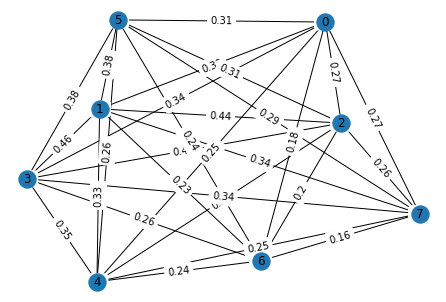

4765              A novel DSP-based LVDT signal conditioner
389626    A Novel Method of Extending the Linearity Rang...
790764    The Design and Implementation of an ANN-based ...
967476    Online implementation of an adaptive calibrati...
817096    IEEE 1588-based Synchronization System for a D...
883395    Application of an FFT-based algorithm to signa...
886092    A multichannel DSP-based instrument for displa...
932883    Five-Point Amplitude Estimation of Sinusoidal ...
Name: title, dtype: object

In [150]:
# df_adj = pd.DataFrame(df_rand.to_numpy(), index=df_adj['abstract'], columns=df_adj['abstract'])
G_adj = nx.from_numpy_matrix(S, create_using=nx.Graph)

# Use spring_layout to handle positioning of graph
layout = nx.spring_layout(G_adj)

# Draw the graph using the layout - with_labels=True if you want node labels.
nx.draw(G_adj, layout, with_labels=True)

# Get weights of each edge and assign to labels
labels = nx.get_edge_attributes(G_adj, "weight")

# Draw edge labels using layout and list of labels
nx.draw_networkx_edge_labels(G_adj, pos=layout, edge_labels=labels)

# for edge in G_adj(data='weight'):
#     nx.draw_networkx_edges(G_adj, pos, edgelist=[edge], width=edge[2])

# Show plot
plt.show()

df_rand['title']
# nx.draw(G_adj, node_size = 20 , node_color = 'blue', with_labels=True)

In [151]:
#create graph from exploded df

G_rand = nx.from_pandas_edgelist(dfG_rand, source='id', target='references', create_using=nx.Graph)

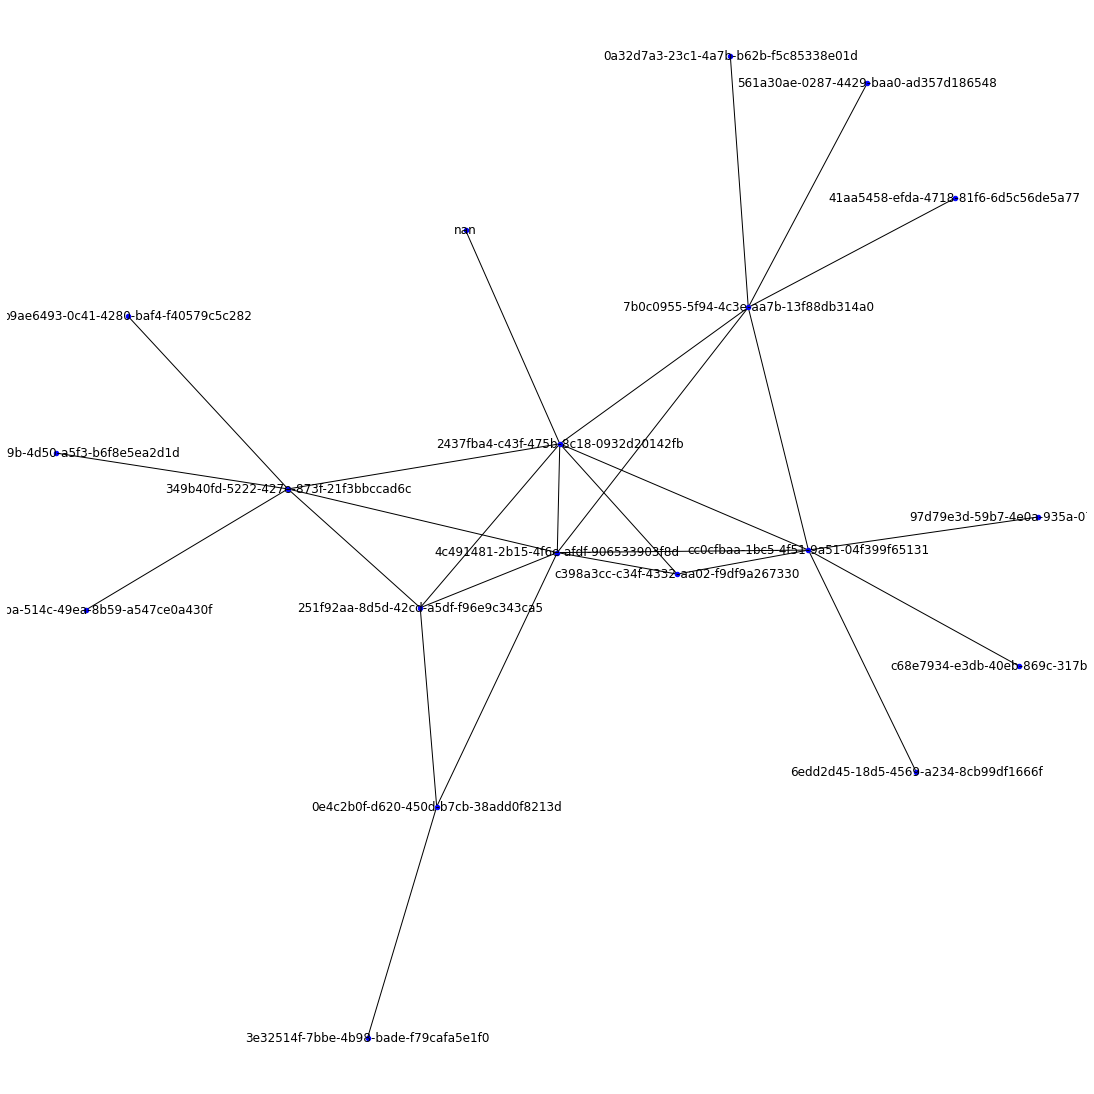

In [152]:
plt.figure(figsize = [15,15]) 
pos = nx.spring_layout(G_rand) 
nx.draw(G_rand, node_size = 20 , node_color = 'blue', with_labels=True)
node_labels = nx.get_node_attributes(G_rand, 'title') 
nx.draw_networkx_labels(G_rand, pos, node_labels)
plt.savefig('cite.png')

##Identify centrality measures and node measures

In [153]:
#identify any max cliques in the graph
C = nx.find_cliques(G_rand)
list(C)

[['0e4c2b0f-d620-450d-b7cb-38add0f8213d',
  '3e32514f-7bbe-4b98-bade-f79cafa5e1f0'],
 ['0e4c2b0f-d620-450d-b7cb-38add0f8213d',
  '4c491481-2b15-4f6e-afdf-906533903f8d',
  '251f92aa-8d5d-42cd-a5df-f96e9c343ca5'],
 ['0a32d7a3-23c1-4a7b-b62b-f5c85338e01d',
  '7b0c0955-5f94-4c3e-aa7b-13f88db314a0'],
 ['c68e7934-e3db-40eb-869c-317b59b51e9a',
  'cc0cfbaa-1bc5-4f51-9a51-04f399f65131'],
 ['be40052f-3b9b-4d50-a5f3-b6f8e5ea2d1d',
  '349b40fd-5222-427e-873f-21f3bbccad6c'],
 ['2437fba4-c43f-475b-8c18-0932d20142fb', nan],
 ['2437fba4-c43f-475b-8c18-0932d20142fb',
  '4c491481-2b15-4f6e-afdf-906533903f8d',
  'cc0cfbaa-1bc5-4f51-9a51-04f399f65131',
  'c398a3cc-c34f-4332-aa02-f9df9a267330'],
 ['2437fba4-c43f-475b-8c18-0932d20142fb',
  '4c491481-2b15-4f6e-afdf-906533903f8d',
  'cc0cfbaa-1bc5-4f51-9a51-04f399f65131',
  '7b0c0955-5f94-4c3e-aa7b-13f88db314a0'],
 ['2437fba4-c43f-475b-8c18-0932d20142fb',
  '4c491481-2b15-4f6e-afdf-906533903f8d',
  '251f92aa-8d5d-42cd-a5df-f96e9c343ca5',
  '349b40fd-5222-427e

In [155]:
# look at degree centrality
deg = nx.degree_centrality(G_rand)
deg_list = sorted(G_rand.degree, key=lambda x: x[1], reverse=True)
print ("Top 10 highest Degree:")
deg_list[0:5]

Top 10 highest Degree:


[('4c491481-2b15-4f6e-afdf-906533903f8d', 7),
 ('2437fba4-c43f-475b-8c18-0932d20142fb', 7),
 ('cc0cfbaa-1bc5-4f51-9a51-04f399f65131', 7),
 ('7b0c0955-5f94-4c3e-aa7b-13f88db314a0', 6),
 ('349b40fd-5222-427e-873f-21f3bbccad6c', 6),
 ('251f92aa-8d5d-42cd-a5df-f96e9c343ca5', 4),
 ('c398a3cc-c34f-4332-aa02-f9df9a267330', 3),
 ('0e4c2b0f-d620-450d-b7cb-38add0f8213d', 3),
 ('6edd2d45-18d5-4569-a234-8cb99df1666f', 1),
 ('97d79e3d-59b7-4e0a-935a-07c6deb2ac11', 1)]

In [156]:
# look at closeness centrality
closeness_cen = nx.closeness_centrality(G_rand)
closeness_list = sorted(closeness_cen.items(), key=lambda x: x[1], reverse=True)

print ("Top 10 highest Closeness:")
closeness_list[0:5]

Top 10 highest Closeness:


[('4c491481-2b15-4f6e-afdf-906533903f8d', 0.6206896551724138),
 ('2437fba4-c43f-475b-8c18-0932d20142fb', 0.6),
 ('cc0cfbaa-1bc5-4f51-9a51-04f399f65131', 0.5454545454545454),
 ('7b0c0955-5f94-4c3e-aa7b-13f88db314a0', 0.5294117647058824),
 ('349b40fd-5222-427e-873f-21f3bbccad6c', 0.4864864864864865),
 ('251f92aa-8d5d-42cd-a5df-f96e9c343ca5', 0.47368421052631576),
 ('c398a3cc-c34f-4332-aa02-f9df9a267330', 0.45),
 ('0e4c2b0f-d620-450d-b7cb-38add0f8213d', 0.4186046511627907),
 (nan, 0.3829787234042553),
 ('6edd2d45-18d5-4569-a234-8cb99df1666f', 0.36)]

In [157]:
# look at eigenvector centrality
eigenvector_cen = nx.eigenvector_centrality(G_rand)
eigenvector_list = sorted(eigenvector_cen.items(), key=lambda x:x[1], reverse=True)

print("Top 10 highest Eigenvector:")
eigenvector_list[0:5]

Top 10 highest Eigenvector:


[('4c491481-2b15-4f6e-afdf-906533903f8d', 0.4656362064770383),
 ('2437fba4-c43f-475b-8c18-0932d20142fb', 0.4527239232231857),
 ('cc0cfbaa-1bc5-4f51-9a51-04f399f65131', 0.37309528661972596),
 ('7b0c0955-5f94-4c3e-aa7b-13f88db314a0', 0.31863193827099995),
 ('349b40fd-5222-427e-873f-21f3bbccad6c', 0.2995551593064395)]

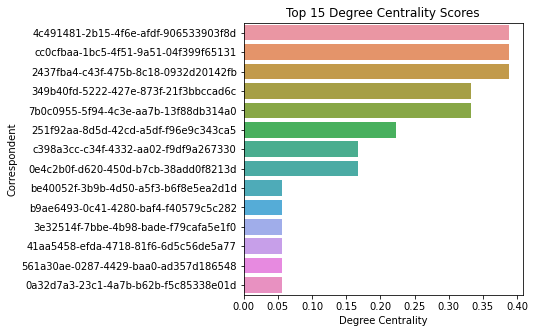

In [160]:
import seaborn as sns
# Top Influential id
deg = nx.degree_centrality(G_rand)
id = []
centrality = []

# Iterating
for key, value in deg.items():
    id.append(key)
    centrality.append(value)

deg = pd.DataFrame()
deg['id'] = id
deg['centrality'] = centrality
deg = deg.sort_values(by= 'centrality', ascending=False)

# Creating plot 
plt.figure(figsize=(5, 5))
_ = sns.barplot(x='centrality', y='id', data=deg[:15], orient='h')
_ = plt.xlabel('Degree Centrality')
_ = plt.ylabel('Correspondent')
_ = plt.title('Top 15 Degree Centrality Scores')
plt.show()